# Úkol 2

Ve strojovém učení často pracujeme i s jinými než textovými daty, například s obrázky. Práci s obrázky si vyzkoušíš v tomto úkolu. Jedním z nejznámějších datasetů je MNIST, který obsahuje obrázky rukou psaných číslic. K obrázkou jsou k dispozici i *labels*, tj. čísla, která na obrázku jsou. Tento dataset je přímo součástí modulu *scikitlearn*, a to ve formě číselné matice. Obrázky mají nízké rozlišení (8x8 pixelů, tj. každý obrázek se skládá z 64 "políček" - 8 políček v 8 řádích, kterým lze přiřadit barvu) a je černobílý.

Tvým úkolem bude vytvořit model, který dokáže rozpoznat, jaké číslo je na každém z obrázků, přičemž využijeme algoritmus Support Vector Machine (SVM). Dataset si můžeš načíst s využitím následujícího kódu. Kód uloží data, která chceme zpracovat, do proměnné *data*. Čísla, která na obrázích skutečně jsou (tj. správné odpovědi) jsou v proměnné *y*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
y = digits.target
data = digits.images

Níže je například matice, která reprezentuje první (v řeči Pythonu nultý) obrázek. Čím vyšší číslo je, tím tmavší je políčko. Čísla jsou v rozsahu 0 až 15.

In [2]:
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Níže je obrázek, který je touto maticí reprezentován. Asi bychom ho odhadli jako 0, což je i správná odpověď.<br>
Obrázek byl vytvořen pomocí modulu *matplotlib* a funkce *imshow*, která vykreslí číselnou matici jako obrázek. (Vvybereme obrázek na pozici 0 a nastavíme černobílé barevné schéma *(cmap=plt.cm.gray_r)*.)

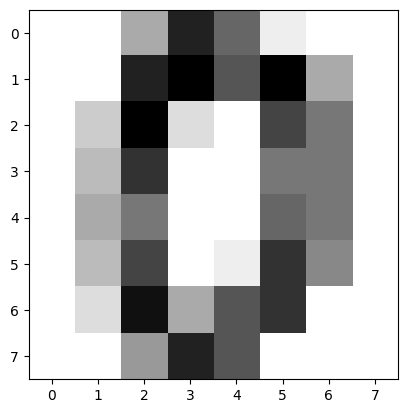

In [3]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

Správnou odpověď najdeme v poli *y*, též na pozici 0.

In [4]:
y[0]

0

Poslední krok je často označován převod dat na flat, tj. na plochá data. Nyní je totiž každé číslo reprezentováno dvourozměrnou maticí 8x8, ale pro použití algoritmu SVC potřebujeme, aby bylo každé číslo reprezentováno jednorozměrně. Můžeš si to představit tak, že chceme, aby každé číslo bylo reprezentováno jedním řádkem v tabulce, která má 64 sloupců.

My ale potřebujeme převést všechna čísla, to uděláme příkazem níže. Hodnotou na nulté pozici seznamu říkáme, kolik máme v našem souboru pozorování, takže metoda *reshape()* vytvoří samostatný řádek každému z čísel.

In [5]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

Nyní je již řada na tobě. Napiš kód, kterým vytvoříš model, který bude klasifikovat obrázek do správné skupiny. Kód je velice blízký tomu, který jsme používali v lekci. Jinými slovy, stačí ti podívat se to materiálů k lekci, není potřeba nic Googlit nebo používat ChatGPT. Ale zakázané to samozřejmě není.

+ Rozděl data na testovací a trénovací pomocí metody *train_test_split*, přičemž nastav parametry *test_size=0.3* a *random_state=42*. Použij stejné názvy proměnných, jaké jsme používali v lekci, tj. *X_train, X_test, y_train, y_test*.
+ Použij klasifikátor *SVC* a jako *kernel* použij *linear*. Parametr *decision_function_shape* nenastavuj a využij výchozí hodnotu, tj. *ovo*. Nenastavuj ani žádné další parametry.
+ Natrénuj model s využitím metody *fit()* a nakonec metodou *predict()* vytvoř pole predikcí pro testovací data, které pojmenuj *y_pred*.
+ Zjisti hodnotu metriky *accuracy* (měla by ti vyjít přibližně *0.9796*) a matici záměn.

In [6]:
# Můžeme si data prohlédnout
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# Nastavím si proměnnou X
X = data
# Rozdělím si data na trénovací a testovací
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Klasifikátor
from sklearn.svm import SVC
clf = SVC(kernel= 'linear', decision_function_shape='ovo', random_state=42)
# Trénování modelu
clf.fit(X_train, y_train)
# Predikce
y_pred = clf.predict(X_test)

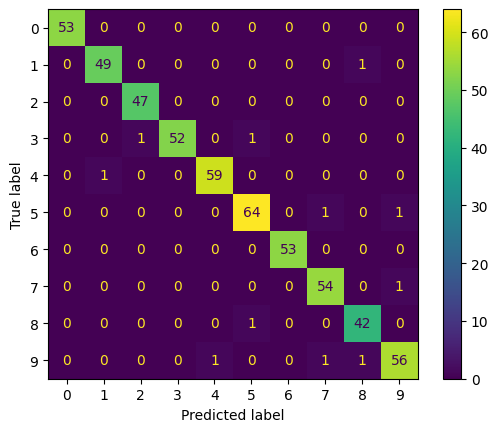

In [8]:
# Vytvořím si matici záměn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [9]:
# A hodnotu accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9796296296296296

## Nepovinný bonus
Algoritmus u některých obrázků nefungoval, určitě bude zajímavé si tyto obrázky prohlédnout. K tomu je potřeba doplnit následující kód, který vlož do svého programu. Na místa označená 1 a 2 je potřeba doplnit kód. Pokud vše doplníš správně, vytvoří ti program několik obrázků, které obsahují špatně predikované obrázky.

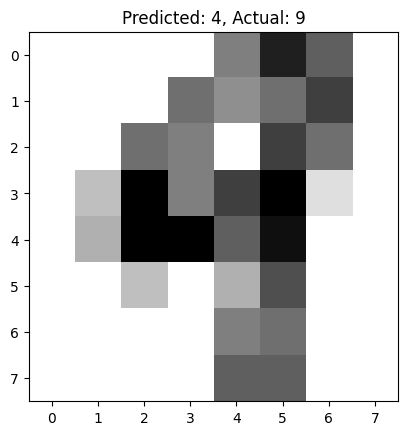

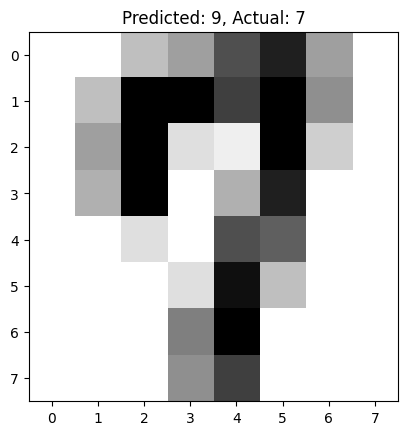

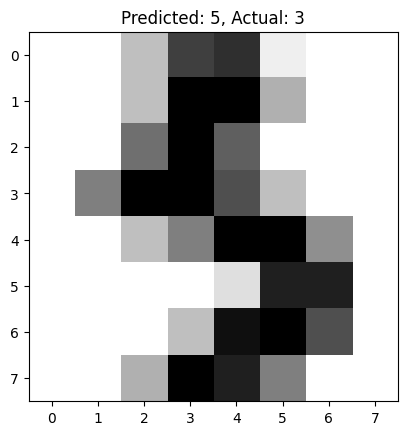

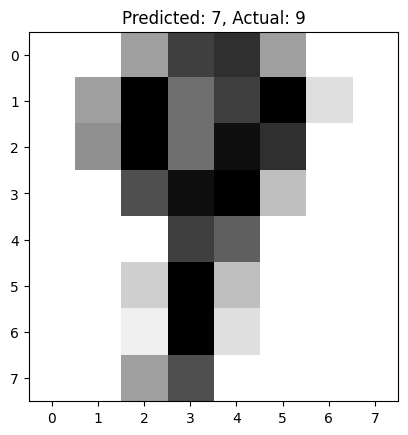

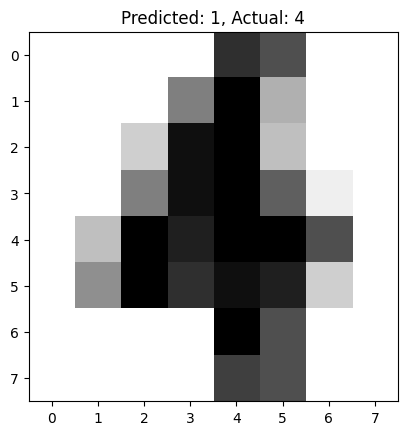

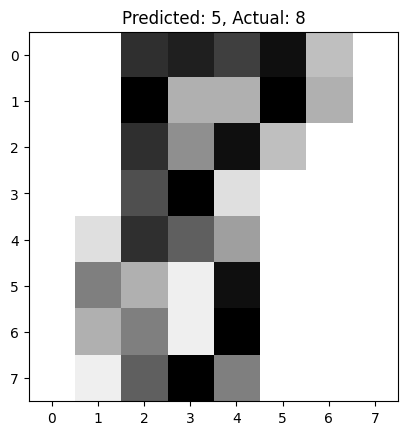

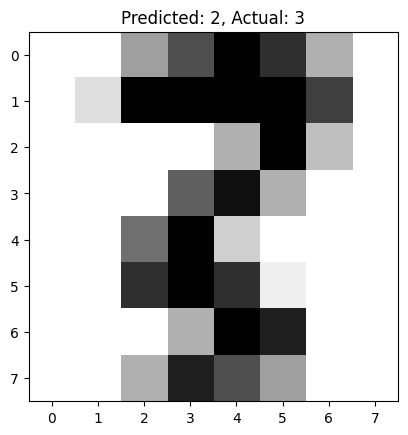

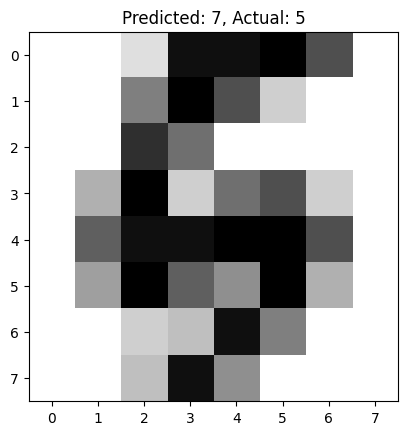

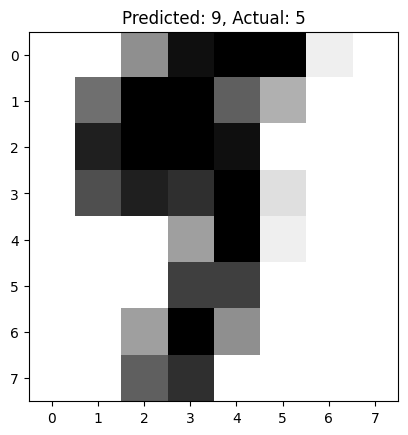

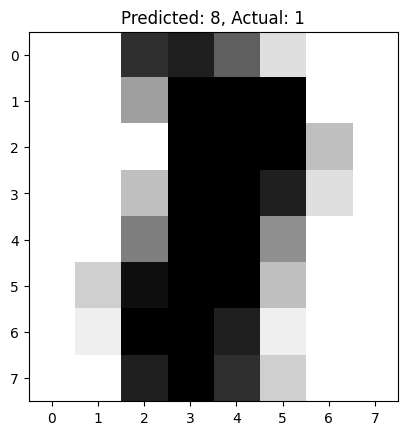

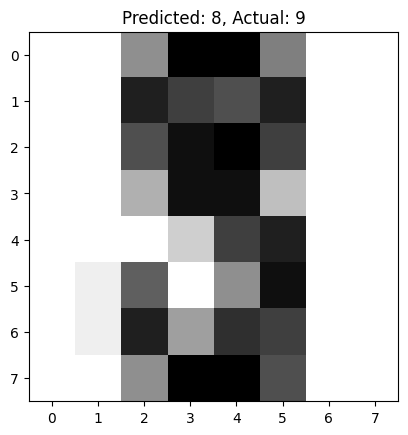

In [11]:
for i in range(0, len(y_pred)):
    # 1 Napiš podmínku, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] != y_test[i]:
        image = X_test[i, :]  # 2 Načtení i-tého obrázku z proměnné X_test
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")
        
        # Můžeme si zobrazit všechny obrázky
        plt.show()